<a href="https://colab.research.google.com/github/komall13/Machine-Learning---Plant-Disease-Detection/blob/main/ML_Model_Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
print("number of image corn in train dataset", len(os.listdir("/content/drive/MyDrive/Plant Disease/Train/Corn_(maize)___Common_rust_")))
print("number of image potato in train dataset", len(os.listdir("/content/drive/MyDrive/Plant Disease/Train/Potato___Early_blight")))
print("number of image tomato in train dataset", len(os.listdir("/content/drive/MyDrive/Plant Disease/Train/Tomato___Bacterial_spot")))

number of image corn in train dataset 83
number of image potato in train dataset 93
number of image tomato in train dataset 35


In [ ]:
import random

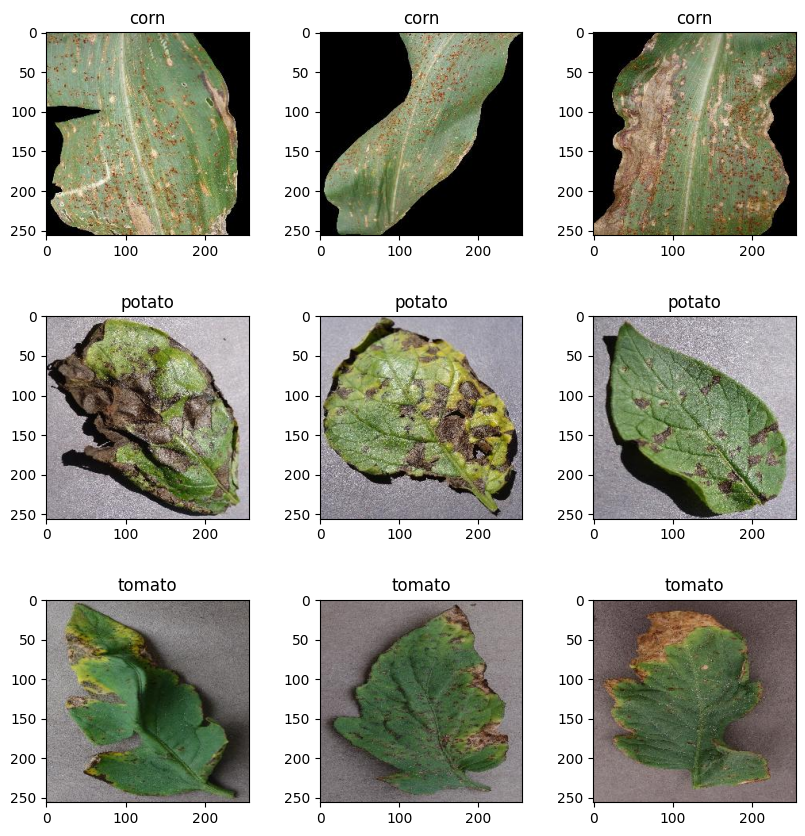

In [ ]:
fig, axes=plt.subplots(3,3,figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)
m=0
corn_path=("/content/drive/MyDrive/Plant Disease/Train/Corn_(maize)___Common_rust_")
potato_path=("/content/drive/MyDrive/Plant Disease/Train/Potato___Early_blight")
tomato_path=("/content/drive/MyDrive/Plant Disease/Train/Tomato___Bacterial_spot")
for i in range(3):
  img=plt.imread(corn_path +"/"+random.choice(os.listdir(corn_path)))
  axes[m].imshow(img)
  axes[m].set_title("corn")
  m=m+1
for i in range(3):
  img=plt.imread(potato_path +"/"+random.choice(os.listdir(potato_path)))
  axes[m].imshow(img)
  axes[m].set_title("potato")
  m=m+1
for i in range(3):
  img=plt.imread(tomato_path +"/"+random.choice(os.listdir(tomato_path)))
  axes[m].imshow(img)
  axes[m].set_title("tomato")
  m=m+1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
)

In [ ]:
train_data=train_gen.flow_from_directory("/content/drive/MyDrive/Plant Disease/Train", target_size=(126,126), class_mode="categorical")

Found 211 images belonging to 3 classes.


In [ ]:
test_data=train_gen.flow_from_directory("/content/drive/MyDrive/Plant Disease/Test", target_size=(126,126), class_mode="categorical")

Found 30 images belonging to 3 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model=Sequential()
model.add((Conv2D(32,(5,5),padding="same" ,input_shape=(126,126,3),activation="relu" )))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(5,5),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(5,5),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(36,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
hist=model.fit(train_data, validation_data=test_data, epochs=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.4019 - loss: 1.1146 - val_accuracy: 0.3333 - val_loss: 1.2595
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6187 - loss: 0.7974 - val_accuracy: 0.6667 - val_loss: 0.6539


In [ ]:
test_loss,test_acc=model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step - accuracy: 0.6667 - loss: 0.6581


In [ ]:
print(test_acc)

0.6666666865348816


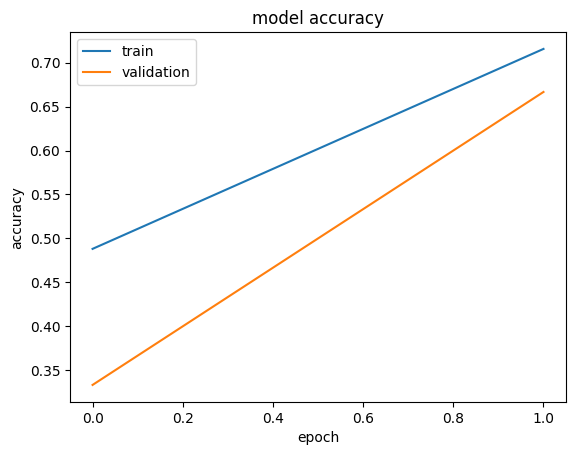

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()

In [ ]:
model.save("plant_disease.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


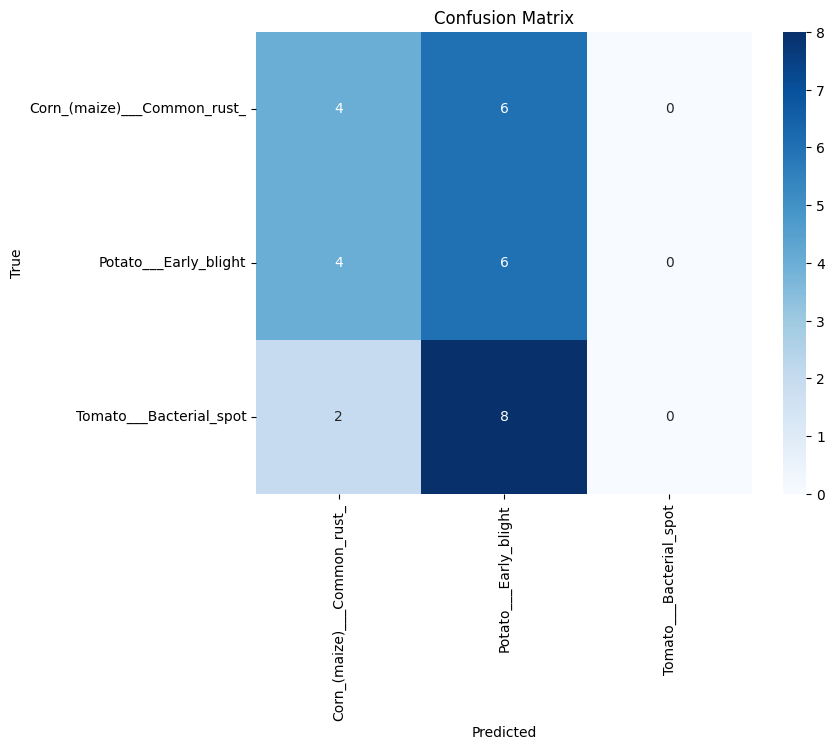

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
Y_true = test_data.classes

cm = confusion_matrix(Y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()